In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/beer-servings.csv')

In [ ]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())
data['spirit_servings'] = data['spirit_servings'].fillna(data['spirit_servings'].median())
data['wine_servings'] = data['wine_servings'].fillna(data['wine_servings'].median())
data['total_litres_of_pure_alcohol'] = data['total_litres_of_pure_alcohol'].fillna(data['total_litres_of_pure_alcohol'].median())

In [ ]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
num_cols = ['beer_servings', 'spirit_servings',	'wine_servings', 'total_litres_of_pure_alcohol']

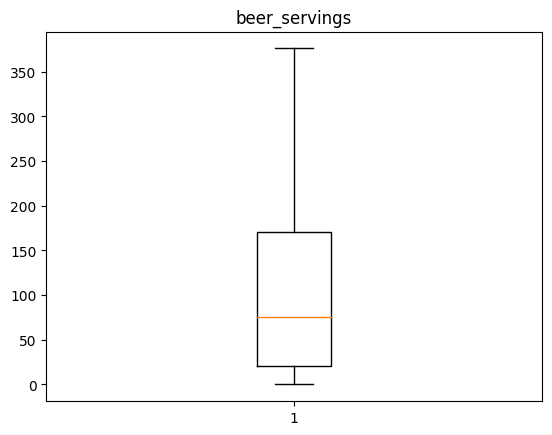

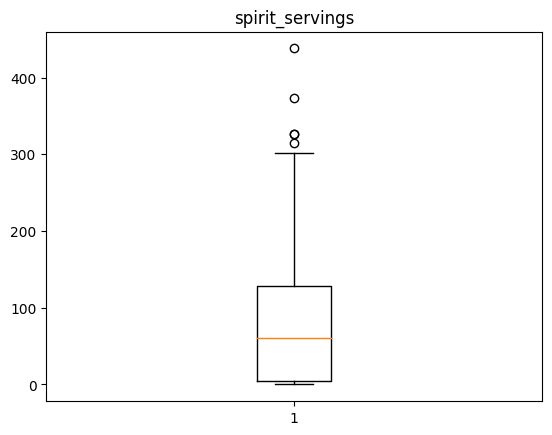

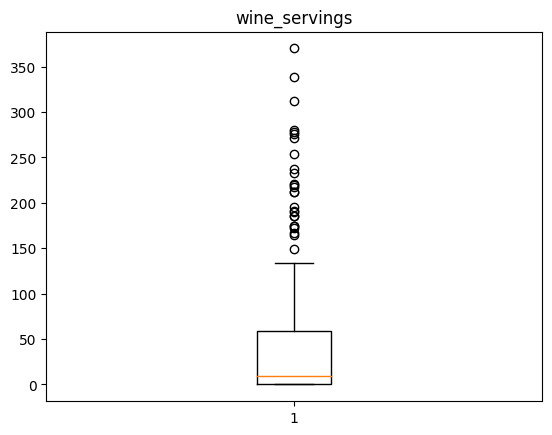

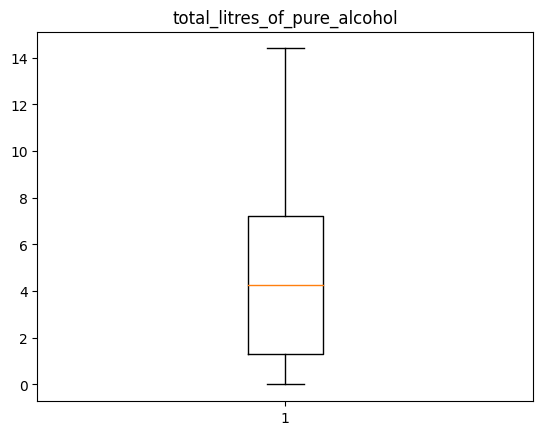

In [ ]:
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [ ]:
Q1 = np.percentile(data['wine_servings'],25,method='midpoint')
Q2 = np.percentile(data['wine_servings'],50,method='midpoint')
Q3 = np.percentile(data['wine_servings'],75,method='midpoint')
Q2 = np.percentile(data['spirit_servings'],50,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

Q1 is  1.0
Q2 is  60.0
Q3 is  59.0


In [ ]:
IQR = Q3-Q1

print('IQR is ',IQR)

IQR is  58.0


In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print("lower limit is",low_lim)
print("upper limit is",up_lim)

lower limit is -86.0
upper limit is 146.0


In [ ]:
outlier=[]
for x in data['wine_servings']:
  if ((x > up_lim) or (x < low_lim)):
    outlier.append(x)

outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [ ]:
data['wine_servings'] = data['wine_servings'].clip(lower=low_lim, upper=up_lim)

In [ ]:
outlier=[]
for x in data['spirit_servings']:
  if ((x > up_lim) or (x < low_lim)):
    outlier.append(x)

outlier

[179.0,
 176.0,
 173.0,
 373.0,
 173.0,
 252.0,
 192.0,
 254.0,
 154.0,
 170.0,
 286.0,
 147.0,
 194.0,
 151.0,
 438.0,
 302.0,
 326.0,
 215.0,
 202.0,
 246.0,
 216.0,
 152.0,
 244.0,
 189.0,
 200.0,
 160.0,
 186.0,
 215.0,
 226.0,
 326.0,
 205.0,
 315.0,
 221.0,
 293.0,
 157.0,
 178.0,
 258.0,
 156.0,
 237.0,
 158.0]

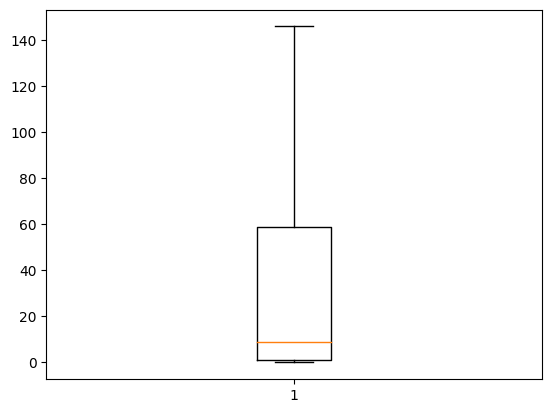

In [ ]:
plt.boxplot(data['wine_servings'])
plt.show()

**Z Score**

In [ ]:
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,146.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
data.isna()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
188,False,False,False,False,False,False,False
189,False,False,False,False,False,False,False
190,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False


In [ ]:
import scipy.stats as stats

In [ ]:
from scipy.stats import zscore

In [ ]:
m = data['beer_servings'].mean()

In [ ]:
m

103.91709844559585

In [ ]:
sd = data['beer_servings'].std()

In [ ]:
sd

98.58014594668882

In [ ]:
def zscore_outlier(data):
  m = np.mean(data)
  sd = np.std(data)
  for i in data:
    Z = (i-m)/sd
    outlier.appen(i)

In [ ]:
outlier

[]

In [60]:
def z_score(df, col):
  mean = df[col].mean()
  std = df[col].std()
  return (df[col]-mean)/std

df = pd.DataFrame()
col = 'beer_servings'
z_score

<function __main__.z_score(df, col)>